In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pickle
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'retina'   

In [2]:
data = pd.read_csv("q3_ai4i2020.csv")

In [3]:
print(data.shape)
data[:10]

(10000, 14)


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


In [4]:
data["Machine failure"].value_counts()

Machine failure
0    9661
1     339
Name: count, dtype: int64

<Axes: >

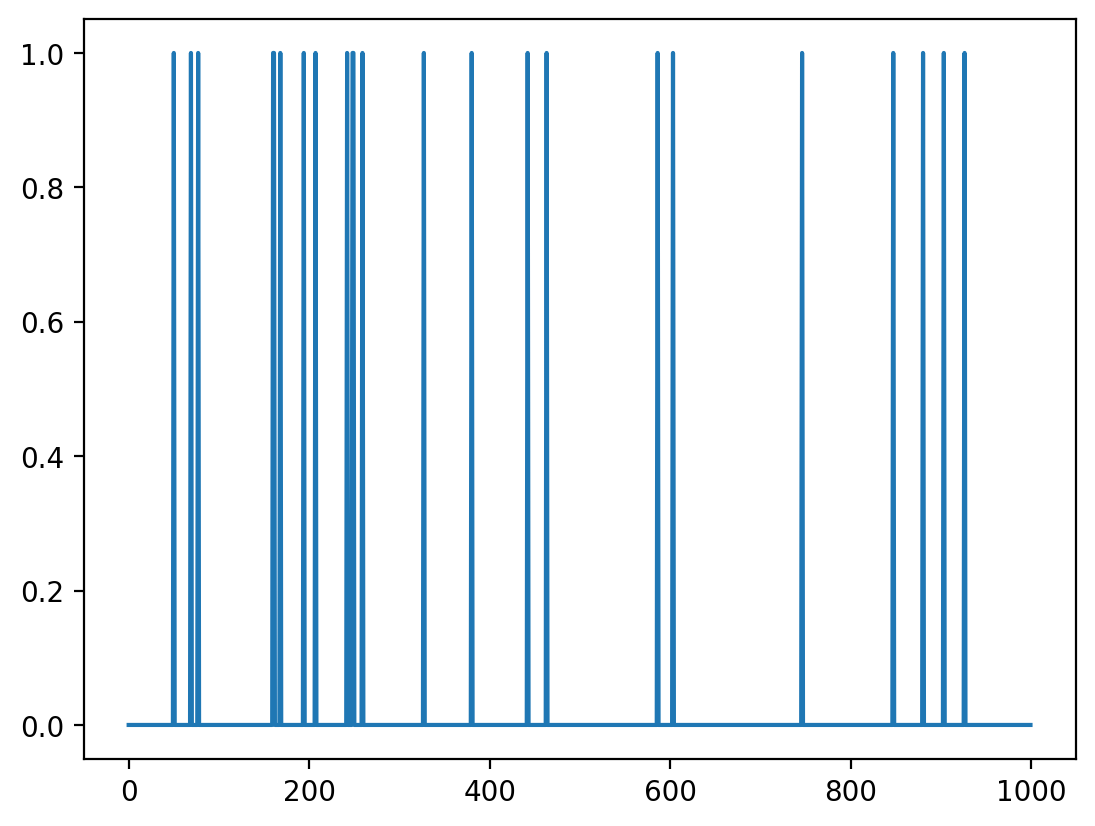

In [5]:
data["Machine failure"][:1000].plot()

In [6]:
df = data.drop(["UDI", "Product ID"], axis=1)

In [7]:
df.Type.value_counts()

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

In [8]:
df = pd.get_dummies(df, "Type")
df[:3]

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,False,False,True
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,False,True,False
2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,False,True,False


In [9]:
# Define the target variable
target_variable = 'Machine failure'

In [10]:
# Calculate the correlation of each input variable with the target variable
correlations = df.corr()[target_variable].drop(target_variable) 

Correlation of input variables with the target variable:
Air temperature [K]        0.082556
Process temperature [K]    0.035946
Rotational speed [rpm]    -0.044188
Torque [Nm]                0.191321
Tool wear [min]            0.105448
TWF                        0.362904
HDF                        0.575800
PWF                        0.522812
OSF                        0.531083
RNF                        0.004516
Type_H                    -0.023916
Type_L                     0.035643
Type_M                    -0.022432
Name: Machine failure, dtype: float64


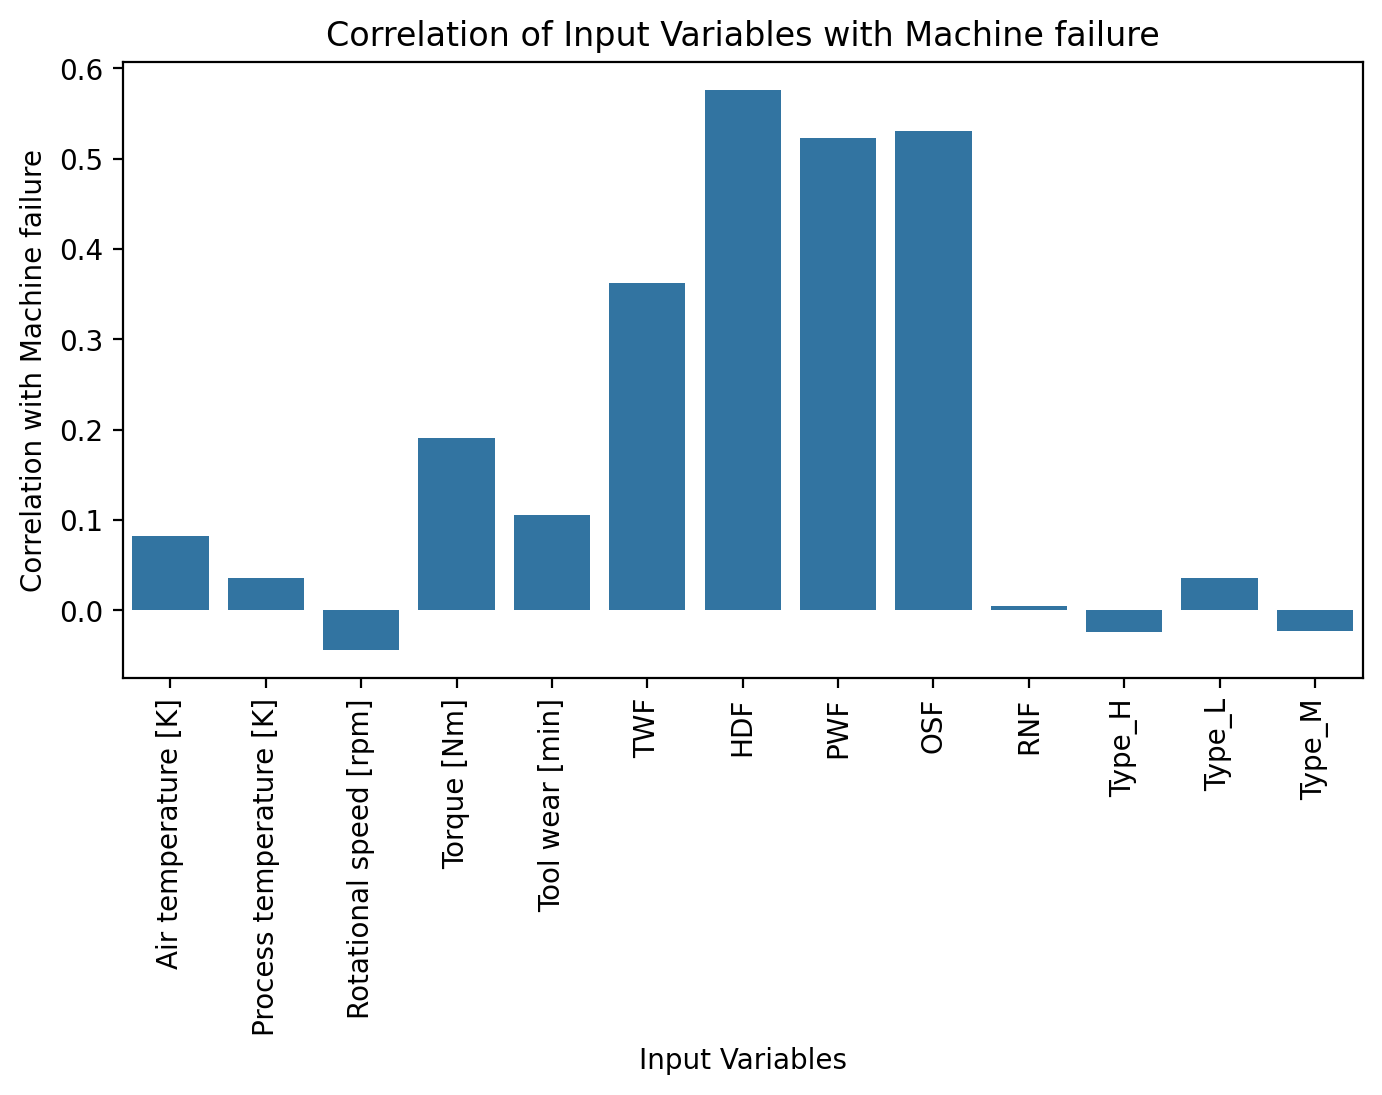

In [11]:
# Print the correlations
print("Correlation of input variables with the target variable:")
print(correlations)

# Plot the correlations
plt.figure(figsize=(8, 4))
sns.barplot(x=correlations.index, y=correlations.values)
plt.xticks(rotation=90)
plt.xlabel('Input Variables')
plt.ylabel('Correlation with Machine failure')
plt.title('Correlation of Input Variables with Machine failure')
plt.show()

In [12]:
df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,False,False,True
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,False,True,False
2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,False,True,False
3,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,False,True,False
4,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,False,False,True
9996,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,True,False,False
9997,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,False,False,True
9998,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,True,False,False


In [13]:
y = df["Machine failure"]

In [14]:
X = df.drop(columns=['Machine failure', 'RNF', 'Type_H', 'Type_L', 'Type_M'])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
# Define models
models = {
    "Linear Model": SGDClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier()
}

best_model = None
best_test_acc = 0

# Define the directory where you want to save the model
model_directory = 'models'
# Ensure the directory exists
os.makedirs(model_directory, exist_ok=True)

# Iterate over models
for idx, (name, model) in enumerate(models.items()):
    print(f"Evaluating {name}...")
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate accuracy scores
    train_acc = accuracy_score(y_train, y_train_pred) * 100
    test_acc = accuracy_score(y_test, y_test_pred) * 100
    print(f'Training Accuracy: {train_acc:.2f}')
    print(f'Testing Accuracy: {test_acc:.2f}')

    # Check for the best model based on test accuracy
    if test_acc > best_test_acc:
        best_test_acc = test_acc
        best_model = model
        best_model_name = name


# Save the best model
best_model_filename = os.path.join(model_directory, 'best_model.pkl')
with open(best_model_filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Best model saved to {best_model}")
print(f"Best model name is {name}")
print(f"Best test accuracy {best_test_acc}")

Evaluating Linear Model...
Training Accuracy: 96.73
Testing Accuracy: 97.40
Evaluating Decision Tree...
Training Accuracy: 100.00
Testing Accuracy: 99.68
Evaluating Random Forest Classifier...
Training Accuracy: 100.00
Testing Accuracy: 99.92
Best model saved to RandomForestClassifier()
Best model name is Random Forest Classifier
Best test accuracy 99.92


In [17]:
X_test[:10]

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF
6252,300.8,310.3,1538,36.1,198,0,0,0,0
4684,303.6,311.8,1421,44.8,101,0,0,0,0
1731,298.3,307.9,1485,42.0,117,0,0,0,0
4742,303.3,311.3,1592,33.7,14,0,0,0,0
4521,302.4,310.4,1865,23.9,129,0,0,0,0
6340,300.5,309.9,1397,45.9,210,1,0,0,0
576,297.7,309.7,1440,51.1,191,0,0,0,0
5202,303.7,312.7,1335,51.1,161,0,0,0,0
6363,300.0,309.6,1618,36.2,53,0,0,0,0
439,297.4,308.3,1535,34.6,51,0,0,0,0


In [18]:
X_eval = X_test[:50]
np.savetxt('evalData.csv', X_eval.values, delimiter=',', fmt='%.1f')
X_eval[:5]

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF
6252,300.8,310.3,1538,36.1,198,0,0,0,0
4684,303.6,311.8,1421,44.8,101,0,0,0,0
1731,298.3,307.9,1485,42.0,117,0,0,0,0
4742,303.3,311.3,1592,33.7,14,0,0,0,0
4521,302.4,310.4,1865,23.9,129,0,0,0,0


In [19]:
X_eval

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF
6252,300.8,310.3,1538,36.1,198,0,0,0,0
4684,303.6,311.8,1421,44.8,101,0,0,0,0
1731,298.3,307.9,1485,42.0,117,0,0,0,0
4742,303.3,311.3,1592,33.7,14,0,0,0,0
4521,302.4,310.4,1865,23.9,129,0,0,0,0
6340,300.5,309.9,1397,45.9,210,1,0,0,0
576,297.7,309.7,1440,51.1,191,0,0,0,0
5202,303.7,312.7,1335,51.1,161,0,0,0,0
6363,300.0,309.6,1618,36.2,53,0,0,0,0
439,297.4,308.3,1535,34.6,51,0,0,0,0


In [20]:
model

RandomForestClassifier()

In [21]:
# Load the trained model
model_filename = 'models/best_model.pkl'
with open(model_filename, 'rb') as file:
    model = pickle.load(file)

prediction = model.predict(X_eval)

print(f'The predicted output is: {prediction}')

The predicted output is: [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
